In [9]:
import pandas as pd

insta = pd.read_csv('insta_hiphop1.csv')

insta = insta['해시태그']

text = list(insta)



In [10]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [11]:
review_cv.shape

(1382, 1000)

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [13]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (1382, 10)


In [14]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [15]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 음악, 힙합, 추천, 노래, 그램, 스타, 랩, 알앤비, 외힙, 리스트
Topic #1: 힙합, 한국, 비, 콘서트, 래퍼, 아티스트, 국힙, 공연, 뮤지션, 음악
Topic #2: 음반, 그램, 스타, 음악, 수집, 힙합, 술집, 블랙뮤직, 감성, 영등포
Topic #3: 힙합, 음악, 비트, 레슨, 앨범, 멜론, 작곡, 일러스트레이터, 메이커, 프로
Topic #4: 추천, 음악, 힙합, 오늘, 곡, 선곡, 한국, 표, 커뮤니티, 국내
Topic #5: 힙합, 맛집, 클럽, 음악, 이태원, 펍, 핫, 진주, 홍대, 술집
Topic #6: 힙합, 랩, 그램, 뮤직, 스타, 일리, 데, 맞팔, 선팔, 소통
Topic #7: 음악, 힙합, 래퍼, 사운드클라우드, 일러스트, 존, 앤, 사진, 리듬, 앨범커버
Topic #8: 그램, 일상, 패션, 스타, 소통, 음, 카페, 스트릿, 여행, 데
Topic #9: 네일, 힙합, 공연, 네일아트, 레코, 힙합댄스, 일리네어, 뮤지컬, 힙합플레이야, 스트릿



In [16]:
twitter_tag.nouns(text[1])

['포스터',
 '사운드클라우드',
 '앨범자켓',
 '아트워크',
 '포스터',
 '디자인',
 '그래픽',
 '포토샵',
 '사진',
 '앨범커버',
 '힙합',
 '일러스트',
 '앨범아트',
 '디지털',
 '아트']

In [17]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [18]:
tokenizer(text[1])

['포스터',
 '사운드클라우드',
 '앨범자켓',
 '아트워크',
 '포스터',
 '디자인',
 '그래픽',
 '포토샵',
 '사진',
 '앨범커버',
 '힙합',
 '일러스트',
 '앨범아트',
 '디지털',
 '아트']

In [19]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [20]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 일상, 그램, 스타, 소통, 힐링, 친구, 여행, 불금, 맞이, 연말
Topic #1: 힙합, 음악, 무비스타, 김봉현, 비보잉, 도시락, 도산, 환상, 서브컬처, 캘리포니아
Topic #2: 스타, 그램, 음악, 힙합, 셀카, 그니, 싱잉랩, 사운드, 소주, 한잔
Topic #3: 음악, 힙합, 운동, 엘릭서, 관리, 장마, 시작, 스트리트, 팝송, 남자
Topic #4: 뮤직, 힙합, 영상, 스트레스, 기분, 헬리오스, 플로, 소니, 라운지, 힙플
Topic #5: 힙합, 사운드클라우드, 포스터, 앨범자켓, 힙스피, 디지털, 음악, 와인, 생맥주, 쇼핑
Topic #6: 댄스, 하우스, 힙합, 배틀, 장르, 힙합댄스, 댄스배틀, 캐슬, 클라우드, 하우스음악
Topic #7: 공연, 힙합, 레코, 힙합댄스, 일리네어, 뮤지컬, 하이, 데이트, 하이라이트, 힙합플레이야
Topic #8: 힙합, 음악, 노래, 최신, 예스, 장미, 듀오, 합정동, 화지, 스타
Topic #9: 클럽, 이태원, 힙합, 파티, 오피, 할로윈, 바자, 와디, 부평, 해쉬
Topic #10: 힙합, 음악, 박재범, 포항, 인디음악, 동아리, 가요, 헤어스타일, 뚝섬역, 경북
Topic #11: 음반, 수집, 그램, 스타, 블랙뮤직, 구매, 정리, 수집가, 세대, 코디
Topic #12: 에픽하이, 음악, 하남, 뮤직스타, 타블로, 미사, 광주, 소통, 강일, 지구
Topic #13: 힙합, 음악, 그림, 감성, 랩퍼, 새벽, 노엘, 직장인, 스윙스, 크라프트
Topic #14: 음악, 부산, 커뮤니티, 모임, 크라운, 미디, 호진, 프로, 헤르츠, 김포
Topic #15: 음악, 추천, 노래, 알앤비, 외힙, 띵곡, 플레이, 리스트, 스타, 기록
Topic #16: 오늘, 선곡, 리스트, 플레이, 국내, 한국, 투데이, 팔로알토, 보이, 창모
Topic #17: 힙합, 서울, 음악, 셀피, 예술원, 입구, 소울, 뚝딱, 김농밀, 랩핑
Topic #18: 음악, 힙합, 

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [1 0 2 1 1 1 1 1 0 1 0 1 1 0 1 3 1 0 0 1 1 0 0 2 1 1 1 0 1 1 0 1 0 0 1 4 0
 1 1 1 0 2 0 1 1 1 1 1 1 1]


In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([-40.744553  ,  95.167694  , -42.200085  , -20.985012  ,
       -87.26691   , -16.024757  , -13.700886  ,  19.80216   ,
        57.872368  , -34.43855   ,  35.856503  ,   1.2997669 ,
       -36.88772   ,  37.14574   ,  45.115253  , -34.856575  ,
       -67.295364  ,  18.522667  ,  23.77178   ,   1.2031106 ,
        16.99919   ,  88.89209   ,  16.139456  , -33.664577  ,
       -32.84914   , -69.89692   ,  24.137709  ,  27.273108  ,
       -13.09077   ,   6.273808  ,  72.96753   , -43.171432  ,
        50.494312  ,  69.92873   , -93.91473   ,  32.677162  ,
         7.9966125 , -53.288296  ,  -0.12575768,  71.12169   ,
       108.11507   , -66.23569   ,  50.569416  ,  -8.34423   ,
        -3.8216333 , -59.276615  , -18.830057  , -58.050354  ,
       -25.18461   , -13.856693  ], dtype=float32)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

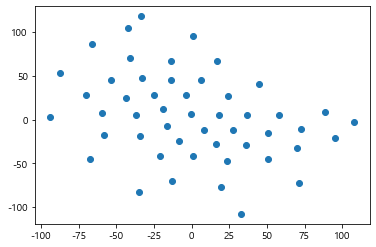

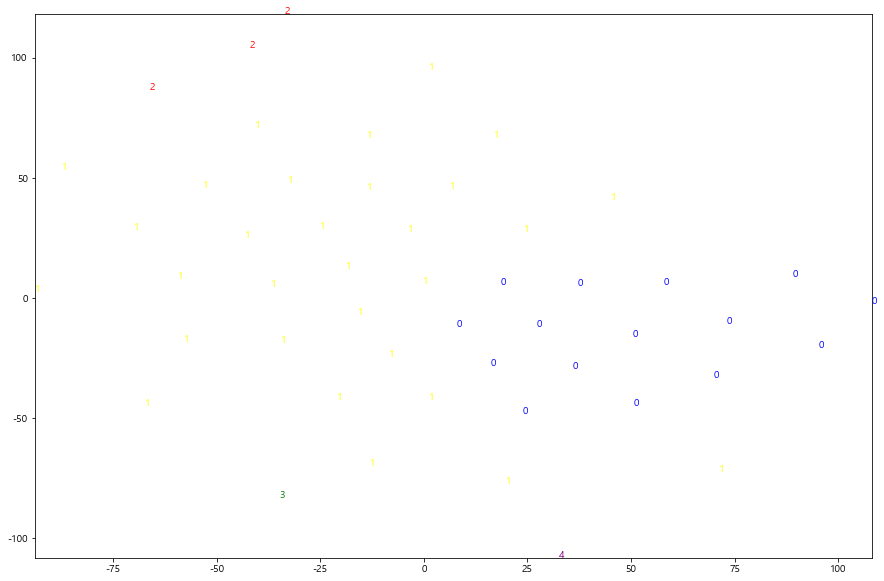

In [24]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

In [25]:
lda.perplexity(review_cv)

246.23535564148415

In [26]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 그램, 스타, 일상, 진주, 음악, 소통, 힙합, 인스타그램, 힐링, 친구
Topic #1: 래퍼, 힙합, 비트, 아티스트, 콘서트, 뮤지션, 국힙, 한국, 버저, 맥주
Topic #2: 스타, 그램, 음악, 힙합, 셀카, 던말릭, 쿤스트, 해방촌, 그니, 베놈
Topic #3: 힙합, 추천, 한국, 음악, 라이브, 퇴근, 팝송, 프리스타일, 스트리트, 넋업샨
Topic #4: 그램, 뮤직, 일리, 맞팔, 선팔, 소통, 덕후, 스타, 스타벅스, 힙합
Topic #5: 힙합, 무대, 음악, 한국, 그린플러그드, 국힙, 래퍼, 힙스피, 예약, 은어
Topic #6: 힙합, 음악, 댄스, 하우스, 배틀, 장르, 뮤직, 힙합댄스, 힙플페, 댄스배틀
Topic #7: 공연, 힙합, 페스티벌, 레코, 힙합댄스, 일리네어, 뮤지컬, 힙합플레이야, 콘서트, 하이
Topic #8: 추천, 노래, 힙합, 음악, 염따, 한국, 최신, 역사, 질라, 예스
Topic #9: 힙합, 클럽, 이태원, 디제이, 음악, 파티, 바이브, 오피, 할로윈, 잠실
Topic #10: 음악, 힙합, 스타, 그램, 메이커, 벅스, 원재, 박재범, 운동, 기분
Topic #11: 음반, 스타, 그램, 수집, 블랙뮤직, 힙합, 구매, 정리, 수집가, 앰비션
Topic #12: 음악, 힙합, 에픽하이, 작곡, 그램, 하남, 뮤직스타, 타블로, 스타, 미사
Topic #13: 네일, 네일아트, 디자인, 스트릿, 유니크, 여름, 일리, 가을, 수제, 패션
Topic #14: 음악, 레슨, 부산, 커뮤니티, 프로, 일러스트레이터, 밴드, 그림, 메이킹, 사랑
Topic #15: 음악, 노래, 알앤비, 외힙, 띵곡, 플레이, 리스트, 기록, 외국, 리뷰
Topic #16: 오늘, 선곡, 한국, 리스트, 플레이, 국내, 힙합, 이센스, 팔로알토, 투데이
Topic #17: 힙합, 음악, 홍대, 서울, 셀피, 예술원, 그램, 피플, 트랩, 스타
Topic #18: 사운드클라우드, 힙합, 카페, 음악

190.43873135530148

In [27]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 음악, 추천, 힙합, 노래, 그램, 스타, 알앤비, 외힙, 플레이, 리스트
Topic #1: 힙합, 음악, 앨범, 비트, 음원, 래퍼, 멜론, 작곡, 헤럴드, 커버
Topic #2: 네일, 스트릿, 네일아트, 디자인, 카페, 유니크, 서울, 패션, 일리, 여름
Topic #3: 음악, 힙합, 사랑, 리듬, 루피, 반사, 블루스, 우린, 크리스천, 기리보이
Topic #4: 그램, 힙합, 스타, 음반, 일리, 뮤직, 맞팔, 소통, 선팔, 음악
Topic #5: 술집, 맛집, 일상, 패션, 사운드클라우드, 홍대, 여행, 감성, 동해, 영등포
Topic #6: 힙합, 음악, 댄스, 뮤직, 하우스, 배틀, 장르, 힙합댄스, 기타, 김해
Topic #7: 힙합, 공연, 음악, 추천, 레코, 부산, 힙합댄스, 일리네어, 뮤지컬, 레슨
Topic #8: 힙합, 한국, 래퍼, 콘서트, 국힙, 아티스트, 공연, 뮤지션, 페스티벌, 음악
Topic #9: 힙합, 오늘, 선곡, 추천, 클럽, 이태원, 음악, 한국, 디제이, 리스트



118.62262462937454

In [28]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 7, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 음악, 힙합, 스타, 그램, 추천, 노래, 알앤비, 외힙, 리스트, 플레이
Topic #1: 힙합, 음악, 래퍼, 앨범, 비트, 콘서트, 아티스트, 국힙, 한국, 뮤지션
Topic #2: 네일, 패션, 스트릿, 홍대, 네일아트, 맛집, 카페, 일상, 일리, 디자인
Topic #3: 힙합, 추천, 음악, 한국, 노래, 사운드클라우드, 레슨, 프로, 듀싱, 사랑
Topic #4: 힙합, 그램, 스타, 음악, 뮤직, 음반, 일리, 소통, 맞팔, 선팔
Topic #5: 힙합, 공연, 술집, 맛집, 레코, 힙합댄스, 감성, 동해, 일리네어, 뮤지컬
Topic #6: 힙합, 음악, 오늘, 선곡, 댄스, 디제이, 한국, 국내, 플레이, 리스트



113.57361091575676